In [ ]:
#Link to Datasets:
#Cresci-2015:

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
root_path = "/content/drive/MyDrive/Bot_detection/cresÍci tweets/cresci 2015"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fake_train = np.load('/content/drive/MyDrive/Bot_detection/cresci tweets/cresci 2015/fake_embeddings_combined_400k.npy')
genuine_test = np.load('/content/drive/MyDrive/Bot_detection/cresci tweets/cresci 2015/genuine_embeddings_combined_400k.npy')
fake_test = np.load('/content/drive/MyDrive/Bot_detection/cresci tweets/cresci 2017/fake_embeddings_test.npy')

In [ ]:
print("Total train bots:",len(fake_train))
print("Total Humans:",len(genuine_test))
print("Total test bots:",len(fake_test))

Total train bots: 395987
Total Humans: 399321
Total test bots: 399974


In [ ]:
fake_test_labels = np.full(len(fake_test), 1)
genuine_test_labels = np.full(len(genuine_test), -1)
test_labels = np.concatenate((fake_test_labels, genuine_test_labels))

print("Number of Fake Test", len(fake_test_labels))
print("Number of Genuine Test", len(genuine_test_labels))
print("Number of Total Test", len(test_labels))

Number of Fake Test 399974
Number of Genuine Test 399321
Number of Total Test 799295


In [ ]:
test_data = np.concatenate((fake_test, genuine_test))
len(test_data)

799295

train data = 80% of bot tweet

- train accuracy determined by 20% of bot tweets (unseen)

test accuracy 100% human tweet (accuracy is reversed) (aka we want low)

###OCSVM Model

In [ ]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.preprocessing import StandardScaler

In [ ]:
ocsvm = svm.OneClassSVM(nu=0.01, kernel='rbf', gamma='scale')

# Train the model
ocsvm.fit(fake_train)
import joblib
filename = '/content/drive/MyDrive/Bot_detection/cresci tweets/ocsvm_model.joblib'
joblib.dump(ocsvm, filename)

['/content/drive/MyDrive/Bot_detection/cresci tweets/ocsvm_model.joblib']

In [ ]:
import joblib

In [ ]:
filename = '/content/drive/MyDrive/Bot_detection/cresci tweets/ocsvm_model.joblib'
joblib.dump(ocsvm, filename)

['/content/drive/MyDrive/Bot_detection/cresci tweets/ocsvm_model.joblib']

In [ ]:
ocsvm = joblib.load('/content/drive/MyDrive/Bot_detection/cresci tweets/ocsvm_model.joblib')

In [ ]:
prediction_test = ocsvm.predict(test_data)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("Accuracy Score:", accuracy_score(test_labels, prediction_test))
print("Precision Score:", precision_score(test_labels, prediction_test))
print("Recall Score:", recall_score(test_labels, prediction_test))
print("F1 Score:", f1_score(test_labels, prediction_test))

Accuracy Score: 0.49085881933453857
Precision Score: 0.49556720698476087
Recall Score: 0.9754809062589068
F1 Score: 0.6572407031823787


In [ ]:
bot = 0
for pre in predictions_new:
  if pre == 1:
    bot+=1

print(bot)

NameError: ignored

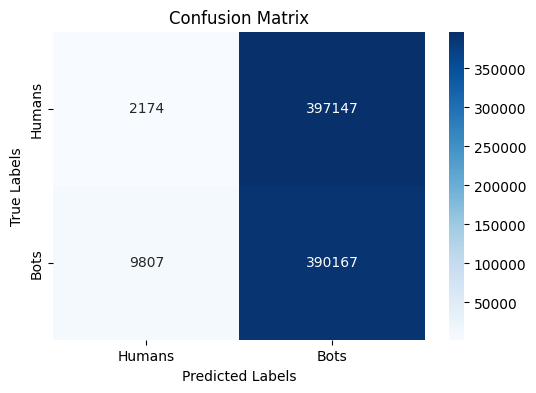

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(test_labels, prediction_test)

# Define class labels (e.g., 'Positive' and 'Negative')
class_labels = ['Humans', 'Bots']

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

###Isolation Forest Model

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
fake_train.shape

(395987, 768)

In [ ]:
from sklearn.ensemble import IsolationForest

# Create an instance of the IsolationForest class
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)

# Fit the model to the data
isolation_forest.fit(fake_train)

IsolationForest(contamination=0.01, random_state=42)

In [ ]:
import joblib

In [ ]:
filename = '/content/drive/MyDrive/Bot_detection/cresci tweets/isolation_forest_model.joblib'
joblib.dump(isolation_forest, filename)

['/content/drive/MyDrive/Bot_detection/cresci tweets/isolation_forest_model.joblib']

In [ ]:
isolation_forest = joblib.load('/content/drive/MyDrive/Bot_detection/cresci tweets/isolation_forest_model.joblib')

In [ ]:
prediction_test = isolation_forest.predict(test_data)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("Accuracy Score:", accuracy_score(test_labels, prediction_test))
print("Precision Score:", precision_score(test_labels, prediction_test))
print("Recall Score:", recall_score(test_labels, prediction_test))
print("F1 Score:", f1_score(test_labels, prediction_test))

Accuracy Score: 0.4745469444948361
Precision Score: 0.48703453743260783
Recall Score: 0.9400061003965258
F1 Score: 0.641629150781434


In [ ]:
print(np.unique(prediction_test))
print(np.unique(prediction_test, return_counts=True)[1] / len(prediction_test))

In [ ]:
bot = 0
for pre in predictions_test:
  if pre == 1:
    bot+=1

print(bot)

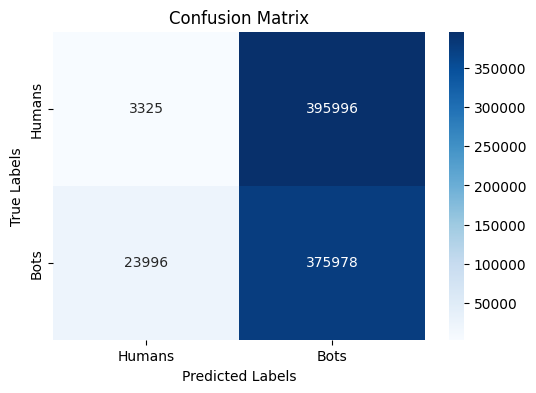

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(test_labels, prediction_test)

# Define class labels (e.g., 'Positive' and 'Negative')
class_labels = ['Humans', 'Bots']

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()